# CAR PRICE PREDICTION

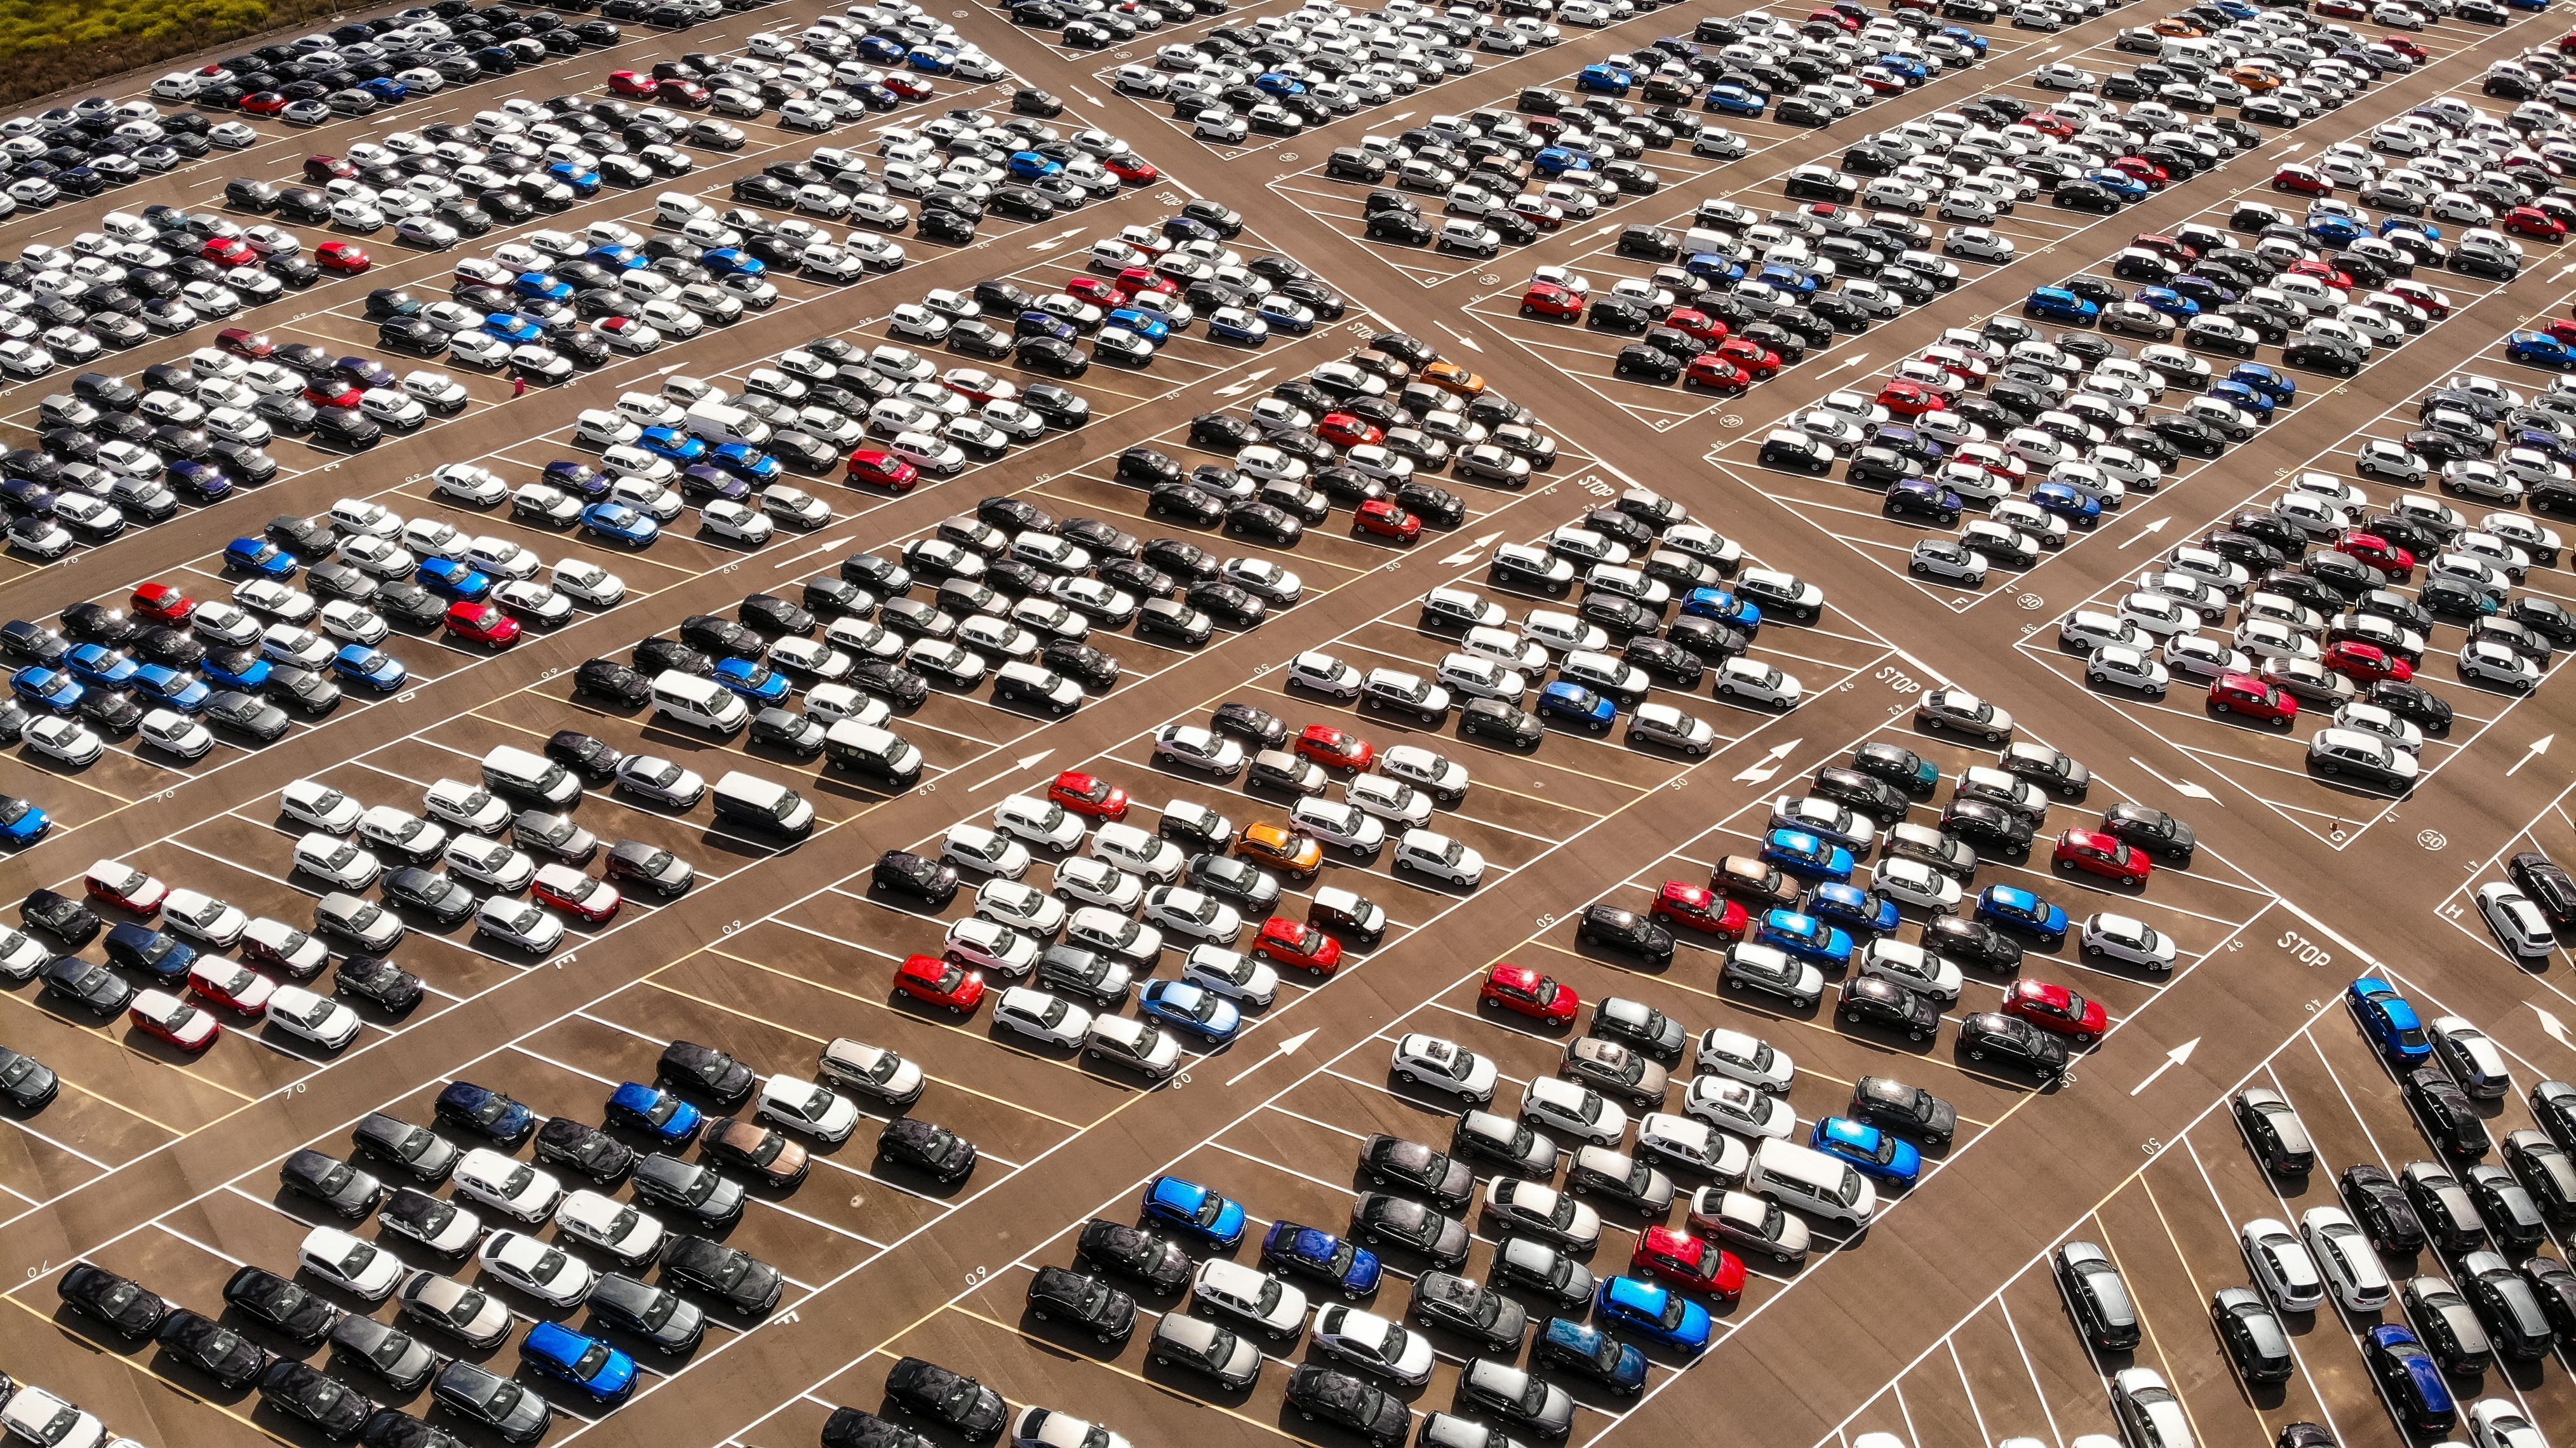

In [80]:
from IPython.display import Image
Image("D:/MSc in ML & AI/Machine Learning 1/Linear Regression/Linear regression Assignment/cars.jpg", height = '200', width = '1000')

## Goal:

It is required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# Read and Understand the Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the data using pandas library

pd.set_option('display.max_columns', 100)
encoding_latin="latin"
carprice = pd.read_csv('D:/MSc in ML & AI/Machine Learning 1/Linear Regression/Linear regression Assignment/CarPrice_Assignment.csv', 
                       low_memory = False, encoding = encoding_latin)
carprice.head(10)

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   
5       6          2                  audi fox      gas        std        two   
6       7          1                audi 100ls      gas        std       four   
7       8          1                 audi 5000      gas        std       four   
8       9          1                 audi 4000      gas      turbo       four   
9      10          0       audi 5000s (diesel)      gas      turbo        two   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   
5        sedan        fwd          front       99.8      177.3      66.3   
6        sedan        fwd          front      105.8      192.7      71.4   
7        wagon        fwd          front      105.8      192.7      71.4   
8        sedan        fwd          front      105.8      192.7      71.4   
9    hatchback        4wd          front       99.5      178.2      67.9   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   
5       53.1        2507        ohc           five         136       mpfi   
6       55.7        2844        ohc           five         136       mpfi   
7       55.7        2954        ohc           five         136       mpfi   
8       55.9        3086        ohc           five         131       mpfi   
9       52.0        3053        ohc           five         131       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   
5       3.19    3.40               8.5         110     5500       19   
6       3.19    3.40               8.5         110     5500       19   
7       3.19    3.40               8.5         110     5500       19   
8       3.13    3.40               8.3         140     5500       17   
9       3.13    3.40               7.0         160     5500       16   

   highwaympg      price  
0          27  13495.000  
1          27  16500.000  
2          26  16500.000  
3          30  13950.000  
4          22  17450.000  
5          25  15250.000  
6          25  17710.000  
7          25  18920.000  
8          20  23875.000  
9          22  17859.167

In [4]:
# Check the size of the data

carprice.shape

(205, 26)

In [5]:
# Check the missing values

carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [6]:
# Check the mean values

carprice.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [7]:
column_name = carprice.columns.values
print("Column names are",column_name)
print("                            ")
print("There are",len(column_name),"column in the dataset")

Column names are ['car_ID' 'symboling' 'CarName' 'fueltype' 'aspiration' 'doornumber'
 'carbody' 'drivewheel' 'enginelocation' 'wheelbase' 'carlength'
 'carwidth' 'carheight' 'curbweight' 'enginetype' 'cylindernumber'
 'enginesize' 'fuelsystem' 'boreratio' 'stroke' 'compressionratio'
 'horsepower' 'peakrpm' 'citympg' 'highwaympg' 'price']
                            
There are 26 column in the dataset


# Clean and Prepare the data

In [8]:
# Split the Company name from the car name column

company_name = carprice['CarName'].apply(lambda x : x.split(' ')[0])
carprice.insert(3, "CompanyName", company_name)
carprice.drop(['CarName'], axis = 1, inplace = True)
carprice.head()

car_ID  symboling  CompanyName fueltype aspiration doornumber      carbody  \
0       1          3  alfa-romero      gas        std        two  convertible   
1       2          3  alfa-romero      gas        std        two  convertible   
2       3          1  alfa-romero      gas        std        two    hatchback   
3       4          2         audi      gas        std       four        sedan   
4       5          2         audi      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
0        rwd          front       88.6      168.8      64.1       48.8   
1        rwd          front       88.6      168.8      64.1       48.8   
2        rwd          front       94.5      171.2      65.5       52.4   
3        fwd          front       99.8      176.6      66.2       54.3   
4        4wd          front       99.4      176.6      66.4       54.3   

   curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
0        2548       dohc           four         130       mpfi       3.47   
1        2548       dohc           four         130       mpfi       3.47   
2        2823       ohcv            six         152       mpfi       2.68   
3        2337        ohc           four         109       mpfi       3.19   
4        2824        ohc           five         136       mpfi       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price  
0    2.68               9.0         111     5000       21          27  13495.0  
1    2.68               9.0         111     5000       21          27  16500.0  
2    3.47               9.0         154     5000       19          26  16500.0  
3    3.40              10.0         102     5500       24          30  13950.0  
4    3.40               8.0         115     5500       18          22  17450.0

In [9]:
carprice.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [10]:
# Correct the missplled names

carprice.CompanyName = carprice.CompanyName.str.lower()
def replace_name(a,b):
    carprice.CompanyName.replace(a,b,inplace = True)
replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')
carprice.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [11]:
# look at how many cars are present of each company in the data frame

carprice['CompanyName'].astype('category').value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
renault         2
mercury         1
Name: CompanyName, dtype: int64

## Univariate Analysis

### Visualize the Data

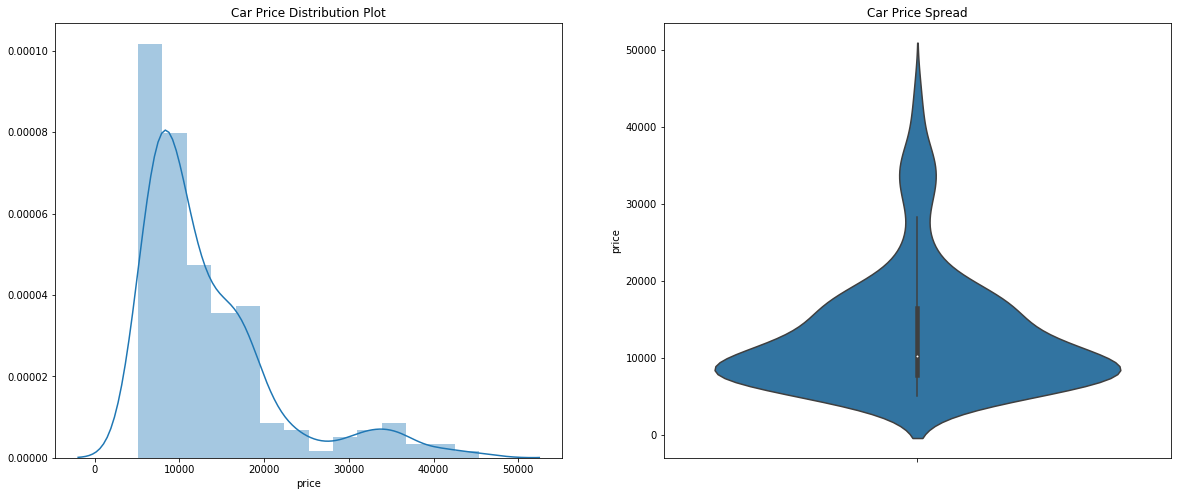

In [12]:
# Car price distribution plot

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(carprice.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.violinplot(y = carprice.price)
plt.show()

In [13]:
# Get the mean percentail of the car price

carprice_percentages = carprice.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1])
print('The carprice at different percentage: ')
print("                                      ")
print(carprice_percentages)

The carprice at different percentage: 
                                      
count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


The above plot are rightly skewed where most of the cars price are below 15000, where there is a significant difference between the mean and the median of the price distribution. The data points are far spread out from the mean, which indicates a high variance in the car prices.

85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.

## Visualizing the Categorical Data

[Text(0, 0.5, 'Frequency of Car type'), Text(0.5, 0, 'Car Type')]

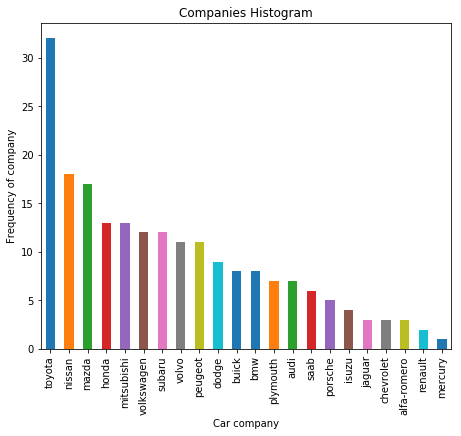

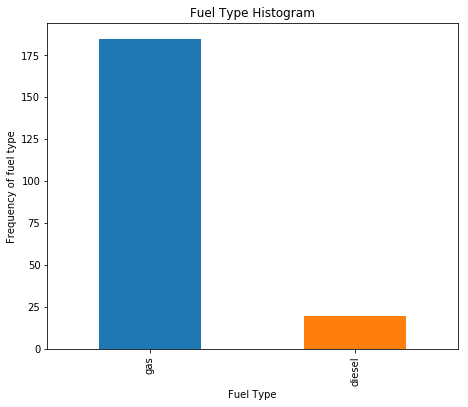

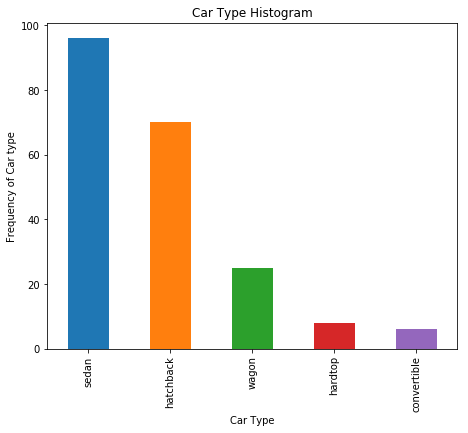

In [14]:
# Plot the cars Company Name with respect to Frequency of the Company

plt.figure(figsize = (25, 6))
plt.subplot(1,3,1)
plt1 = carprice.CompanyName.value_counts().plot('bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

# Plot the cars Fuel Type with respect to Frequency of the Fuel Type

plt.figure(figsize = (25, 6))
plt.subplot(1,3,2)
plt1 = carprice.fueltype.value_counts().plot('bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel = 'Frequency of fuel type')

# Plot the Car Body with respect to Frequency of the Car type

plt.figure(figsize = (25, 6))
plt.subplot(1,3,3)
plt1 = carprice.carbody.value_counts().plot('bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

Toyota is the most favourable car Company

No. of diesel cars are less than gas fuel cars

Sedan class is the top car type prefered

In [15]:
# Cars Symboling vs Price

carprice['symboling'].astype('category').value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

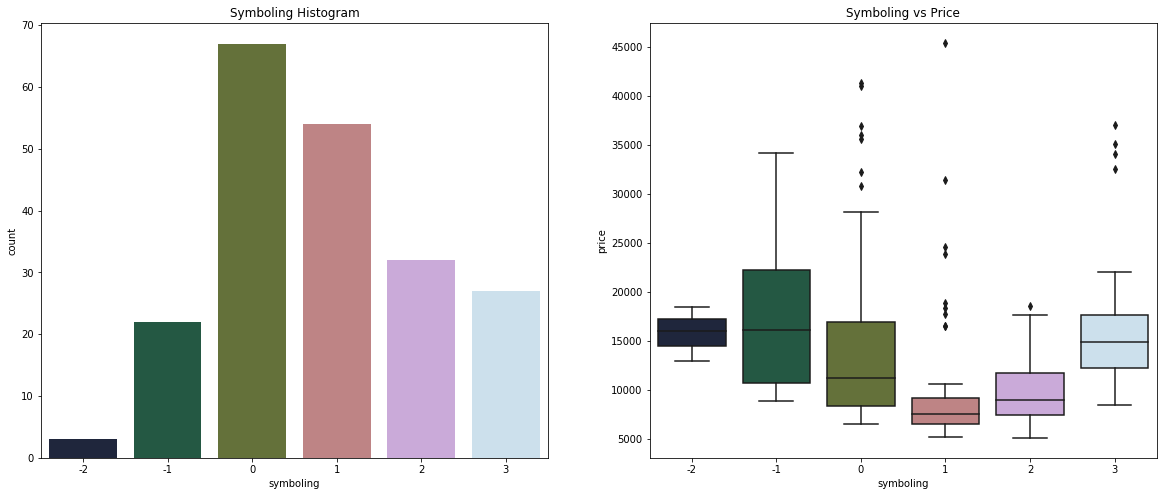

In [16]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(carprice.symboling, palette = ("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x = carprice.symboling, y = carprice.price, palette = ("cubehelix"))
plt.show()

Symboling with 0 and 1 values have high number of rows or they are mostly sold.

The cars with -1 symboling seems to be high priced where insurance risk rating -1 is quite good. But it seems that symboling with 3 value has the price range similar to -2 value. There is a dip in price at symboling 1.

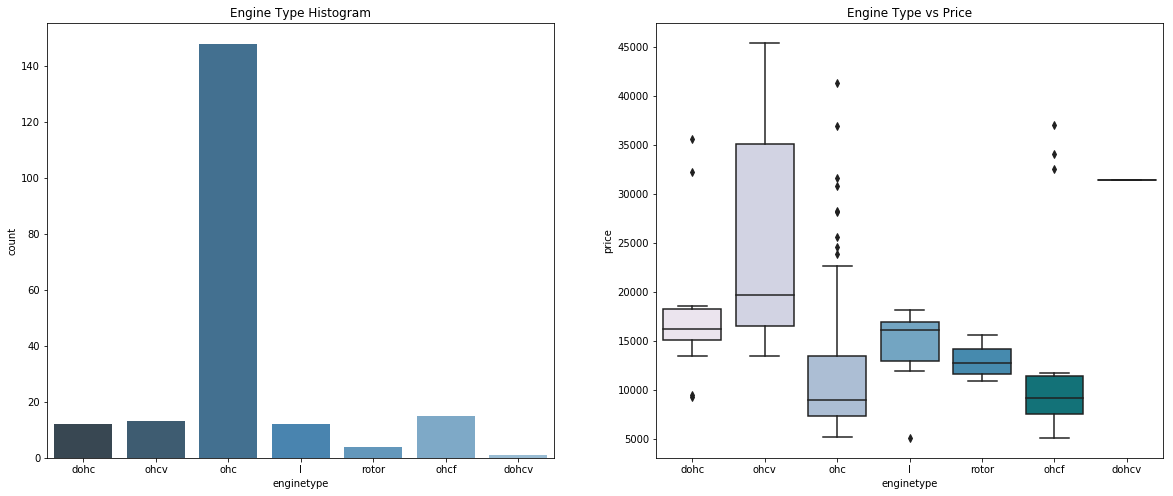

In [17]:
# Engine Type vs Price

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(carprice.enginetype, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x = carprice.enginetype, y = carprice.price, palette=("PuBuGn"))
plt.show()

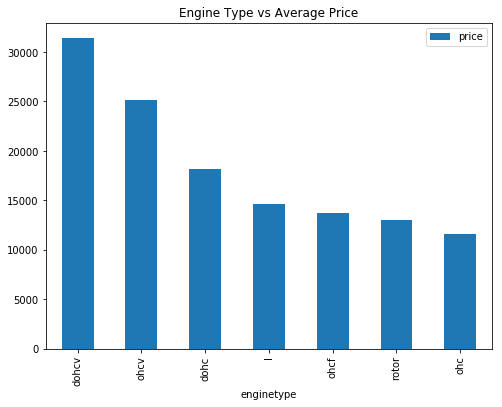

In [18]:
# Get the average price on the basis of each engine type

df = pd.DataFrame(carprice.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize = (8,6))
plt.title('Engine Type vs Average Price')
plt.show()

ohc Engine type seems to be most favored type. Where ohcv has the highest price range where ohc and ohcf have the low price range.

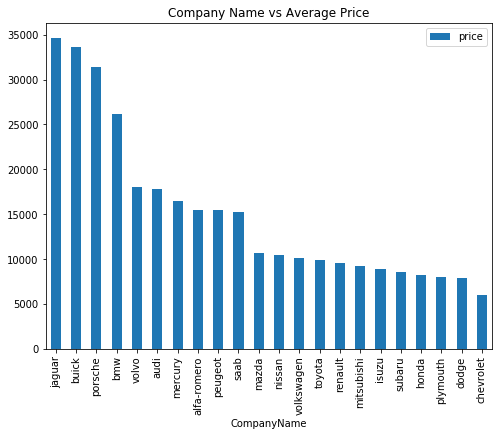

In [19]:
# Plot Company Name vs Average Price

df = pd.DataFrame(carprice.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize = (8,6))
plt.title('Company Name vs Average Price')
plt.show()

The highest average car price companies are Jaguar, Buick, Porsche and BMW

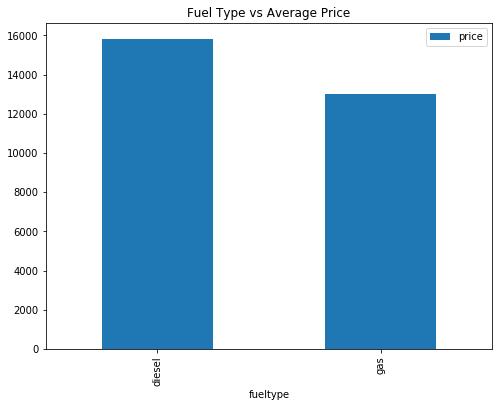

In [20]:
# Plot Fuel Type vs Average Price

df = pd.DataFrame(carprice.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize = (8,6))
plt.title('Fuel Type vs Average Price')
plt.show()

Diesel has highest average price than Gas fuel

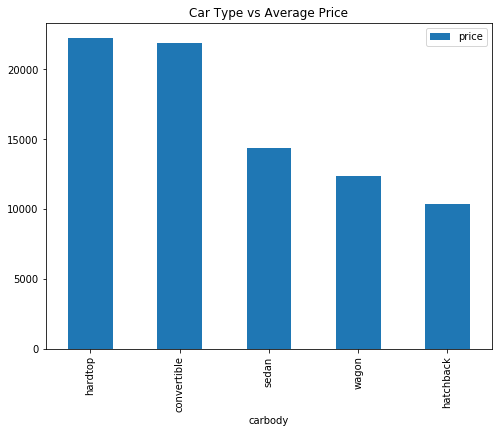

In [21]:
# Plot Car Type vs Average Price

df = pd.DataFrame(carprice.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize = (8,6))
plt.title('Car Type vs Average Price')
plt.show()

Hardtop and Convertible have higher average price.

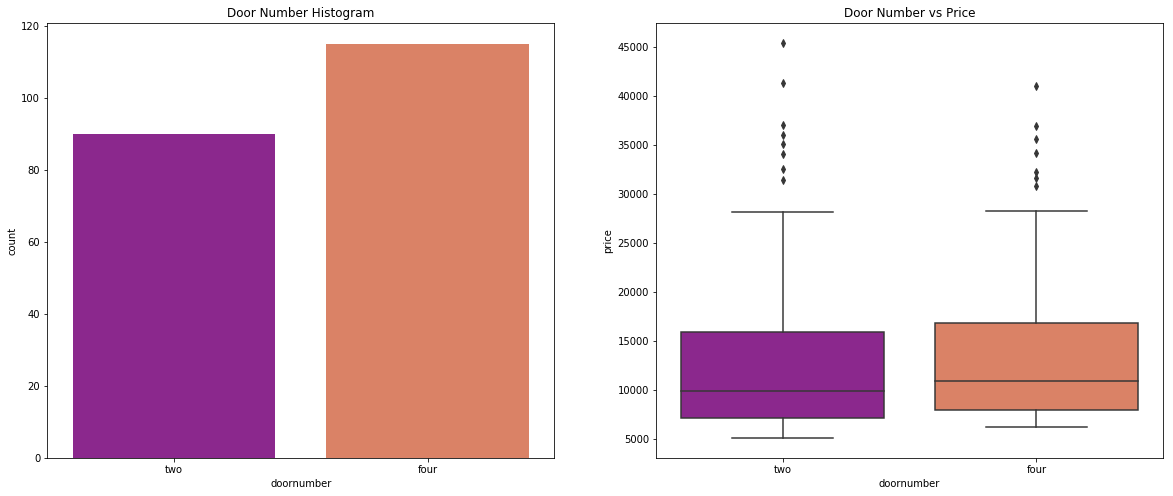

In [22]:
# Plot No. of doors vs price

plt.figure(figsize = (20,8))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(carprice.doornumber, palette = ("plasma"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x = carprice.doornumber, y = carprice.price, palette = ("plasma"))
plt.show()

Door number variable is not affacting the price much.

In [23]:
# aspiration: An (internal combustion) engine property

carprice['aspiration'].astype('category').value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

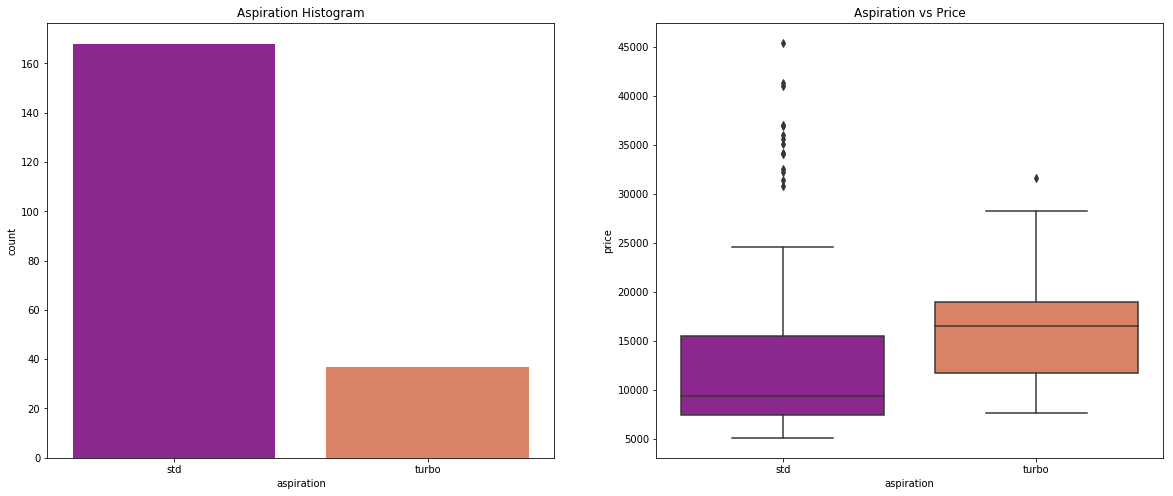

In [24]:
# Plot Aspiration vs Price

plt.figure(figsize = (20,8))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(carprice.aspiration, palette = ("plasma"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x = carprice.aspiration, y = carprice.price, palette = ("plasma"))

plt.show()

It seems aspiration with turbo have higher price range than the std.

In [25]:
# drivewheel: frontwheel, rarewheel or four-wheel drive

carprice['drivewheel'].astype('category').value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

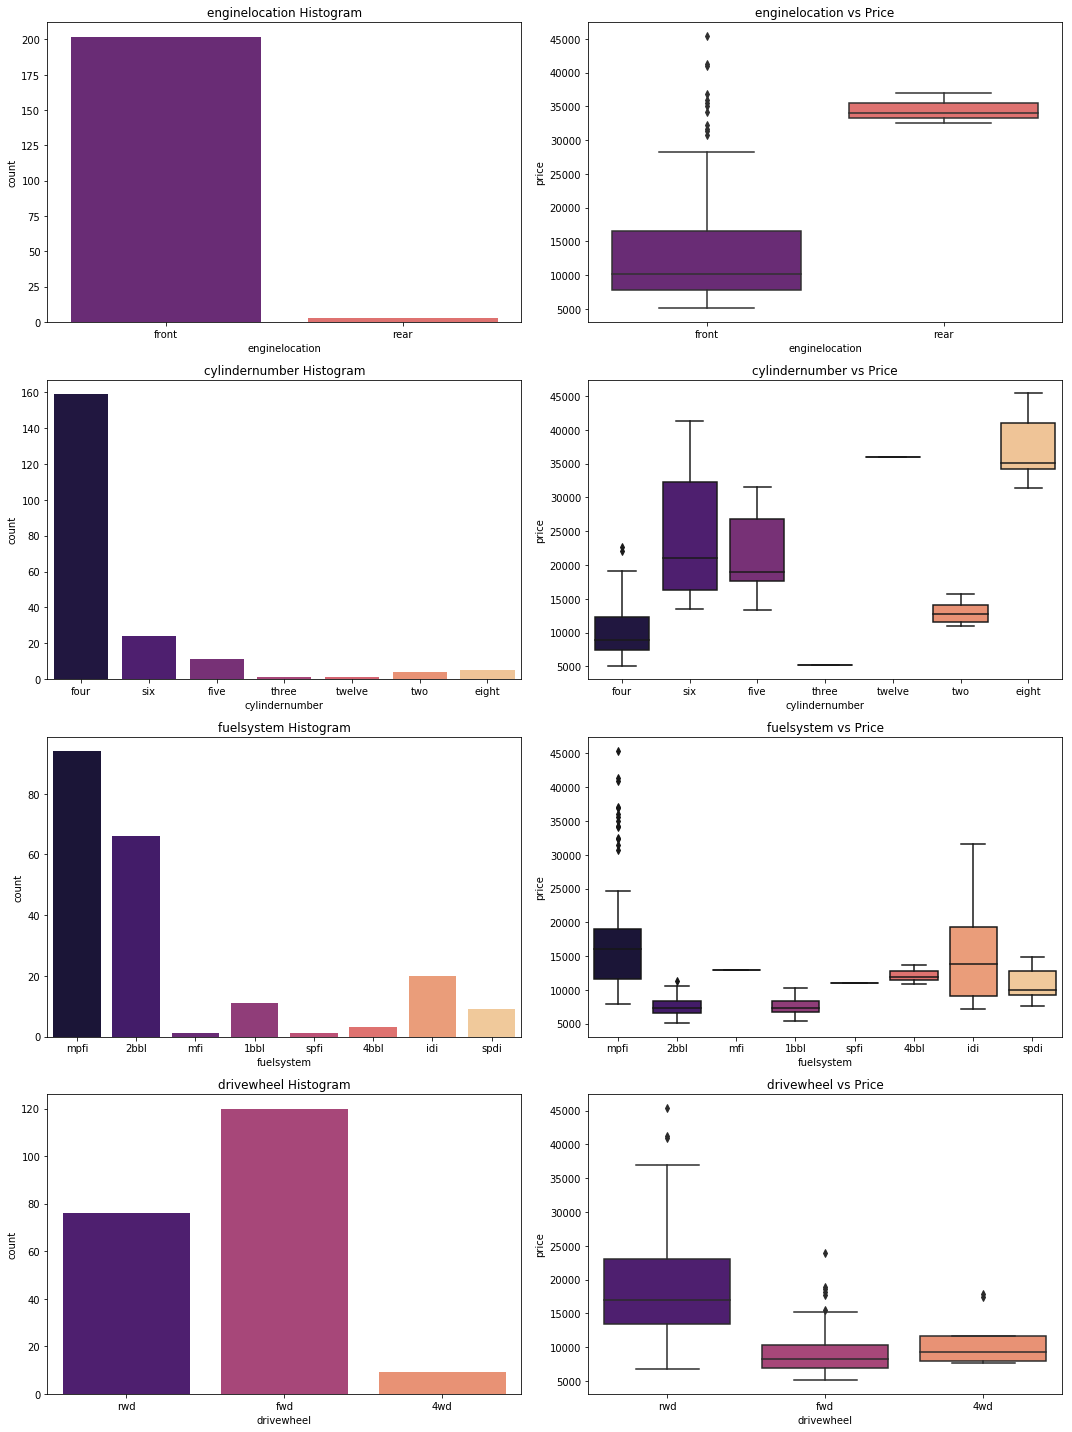

In [26]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(carprice[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=carprice[x], y=carprice.price, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()

Very few datapoints for enginelocation categories to make a difference.

Most common number of cylinders are four, six and five. Anyhow eight cylinders have the highest price range.

mpfi and 2bbl are most common type of fuel systems. mpfi and idi having the highest price range. But there are few data for other categories to derive any meaningful inference.

A very significant difference in drivewheel category. Most high ranged cars seeme to prefer rwd drivewheel.

## Visualizing Numerical Data

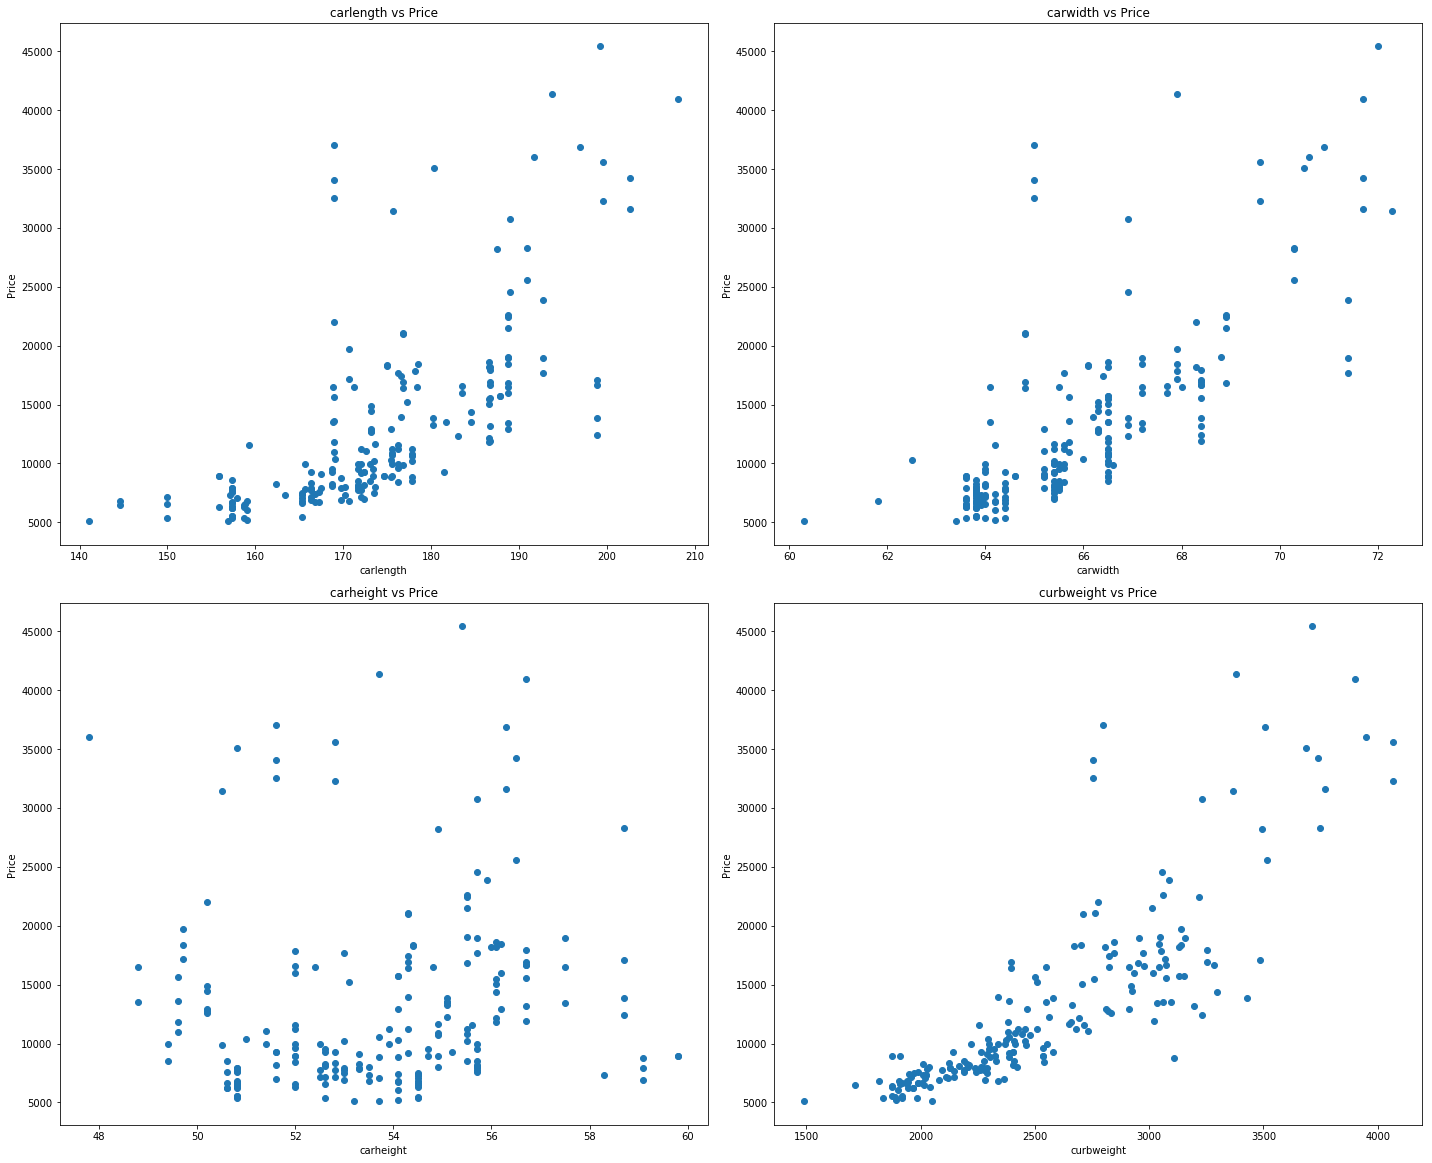

In [27]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(carprice[x], carprice['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(20,40))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

Carwidth, carlength and curbweight seems to have a positive correlation with price.

Carheight doesn't show any significant trend with price.

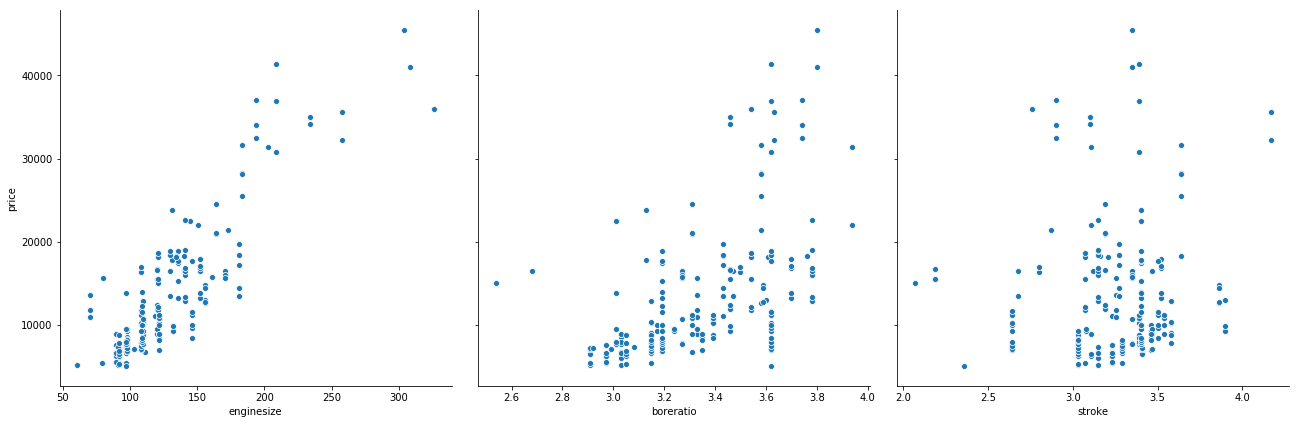

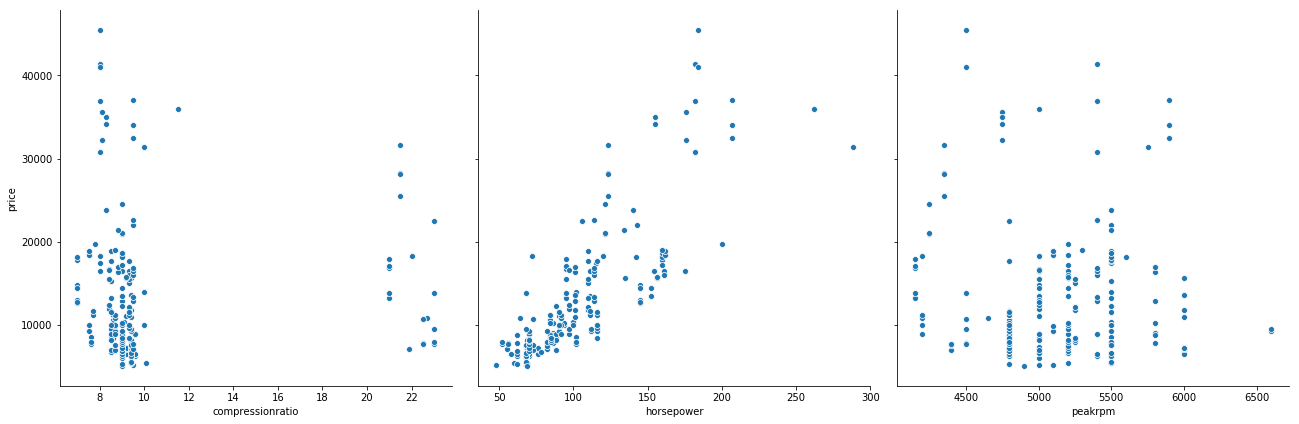

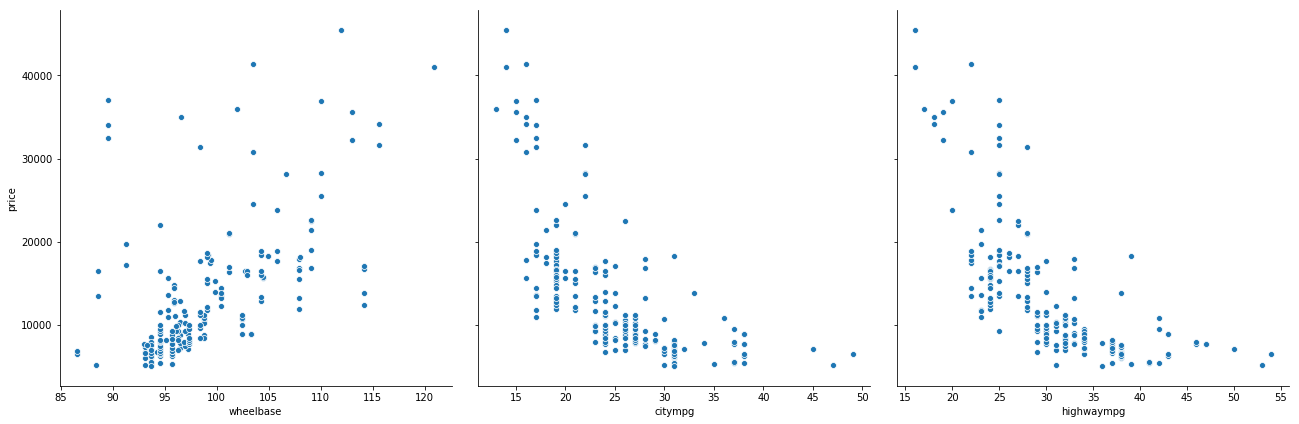

In [28]:
def pair_plot(x,y,z):
    sns.pairplot(carprice, x_vars = [x,y,z], y_vars = 'price', size = 6, aspect = 1, kind = 'scatter')
    plt.show()
pair_plot('enginesize', 'boreratio', 'stroke')
pair_plot('compressionratio', 'horsepower', 'peakrpm')
pair_plot('wheelbase', 'citympg', 'highwaympg')

Enginesize, boreratio, horsepower, wheelbase - seem to have a significant positive correlation with price where citympg, highwaympg - seem to have a significant negative correlation with price.

In [29]:
# Correlation coefficient with respect to car length and car width

carprice_coef = np.corrcoef(carprice['carlength'], carprice['carwidth'])[0, 1]
print("The correlation coefficient with respect to car length and car width is:", carprice_coef)

The correlation coefficient with respect to car length and car width is: 0.841118268481845


## Deriving some new features

In [30]:
# Fuel Economy

carprice['fueleconomy'] = (0.55 * carprice['citympg']) + (0.45 * carprice['highwaympg'])
carprice['fueleconomy'].head(10)

0    23.70
1    23.70
2    22.15
3    26.70
4    19.80
5    21.70
6    21.70
7    21.70
8    18.35
9    18.70
Name: fueleconomy, dtype: float64

In [31]:
# Binding the Car Companies based on avg prices of each Company.

carprice['price'] = carprice['price'].astype('int')
temp = carprice.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how = 'left', on = 'CompanyName')
bins = [0,10000,20000,40000]
carprice_bin=['Budget','Medium','Highend']
carprice['carsrange'] = pd.cut(temp['price_y'], bins, right = False, labels = carprice_bin)
carprice.head()

car_ID  symboling  CompanyName fueltype aspiration doornumber      carbody  \
0       1          3  alfa-romero      gas        std        two  convertible   
1       2          3  alfa-romero      gas        std        two  convertible   
2       3          1  alfa-romero      gas        std        two    hatchback   
3       4          2         audi      gas        std       four        sedan   
4       5          2         audi      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
0        rwd          front       88.6      168.8      64.1       48.8   
1        rwd          front       88.6      168.8      64.1       48.8   
2        rwd          front       94.5      171.2      65.5       52.4   
3        fwd          front       99.8      176.6      66.2       54.3   
4        4wd          front       99.4      176.6      66.4       54.3   

   curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
0        2548       dohc           four         130       mpfi       3.47   
1        2548       dohc           four         130       mpfi       3.47   
2        2823       ohcv            six         152       mpfi       2.68   
3        2337        ohc           four         109       mpfi       3.19   
4        2824        ohc           five         136       mpfi       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  price  \
0    2.68               9.0         111     5000       21          27  13495   
1    2.68               9.0         111     5000       21          27  16500   
2    3.47               9.0         154     5000       19          26  16500   
3    3.40              10.0         102     5500       24          30  13950   
4    3.40               8.0         115     5500       18          22  17450   

   fueleconomy carsrange  
0        23.70    Medium  
1        23.70    Medium  
2        22.15    Medium  
3        26.70    Medium  
4        19.80    Medium

## Bivariate Analysis 

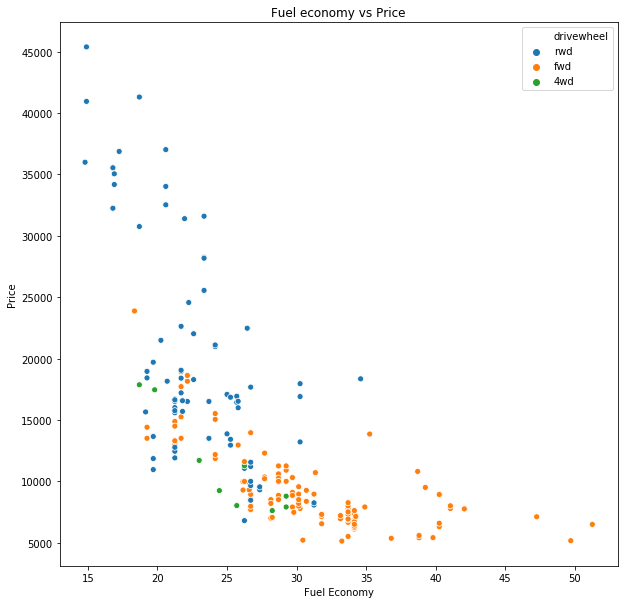

<Figure size 432x288 with 0 Axes>

In [32]:
# Plot Fuel economy vs Price

plt.figure(figsize=(10,10))
plt.title('Fuel economy vs Price')
sns.scatterplot(x = carprice['fueleconomy'], y = carprice['price'], hue = carprice['drivewheel'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')
plt.show()
plt.tight_layout()

Fuel Economy has a negative correlation with price and it's significant.

<Figure size 2880x2160 with 0 Axes>

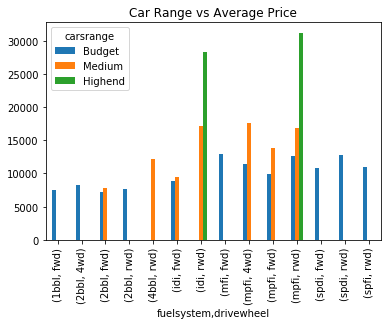

In [33]:
# Plot Car Range vs Average Price

plt.figure(figsize=(40, 30))
df = pd.DataFrame(carprice.groupby(['fuelsystem','drivewheel','carsrange'])['price'].mean().unstack(fill_value=0))
df.plot.bar()
plt.title('Car Range vs Average Price')
plt.show()

High ranged cars prefer rwd drivewheel with idi or mpfi fuelsystem.

## After the visual analysis the list of significant variables are: 

In [34]:
carprice.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'fueleconomy', 'carsrange'],
      dtype='object')

In [35]:
carprice_lr = carprice[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth', 'carsrange']]
carprice_lr.head()

price fueltype aspiration      carbody drivewheel  wheelbase  curbweight  \
0  13495      gas        std  convertible        rwd       88.6        2548   
1  16500      gas        std  convertible        rwd       88.6        2548   
2  16500      gas        std    hatchback        rwd       94.5        2823   
3  13950      gas        std        sedan        fwd       99.8        2337   
4  17450      gas        std        sedan        4wd       99.4        2824   

  enginetype cylindernumber  enginesize  boreratio  horsepower  fueleconomy  \
0       dohc           four         130       3.47         111        23.70   
1       dohc           four         130       3.47         111        23.70   
2       ohcv            six         152       2.68         154        22.15   
3        ohc           four         109       3.19         102        26.70   
4        ohc           five         136       3.19         115        19.80   

   carlength  carwidth carsrange  
0      168.8      64.1    Medium  
1      168.8      64.1    Medium  
2      171.2      65.5    Medium  
3      176.6      66.2    Medium  
4      176.6      66.4    Medium

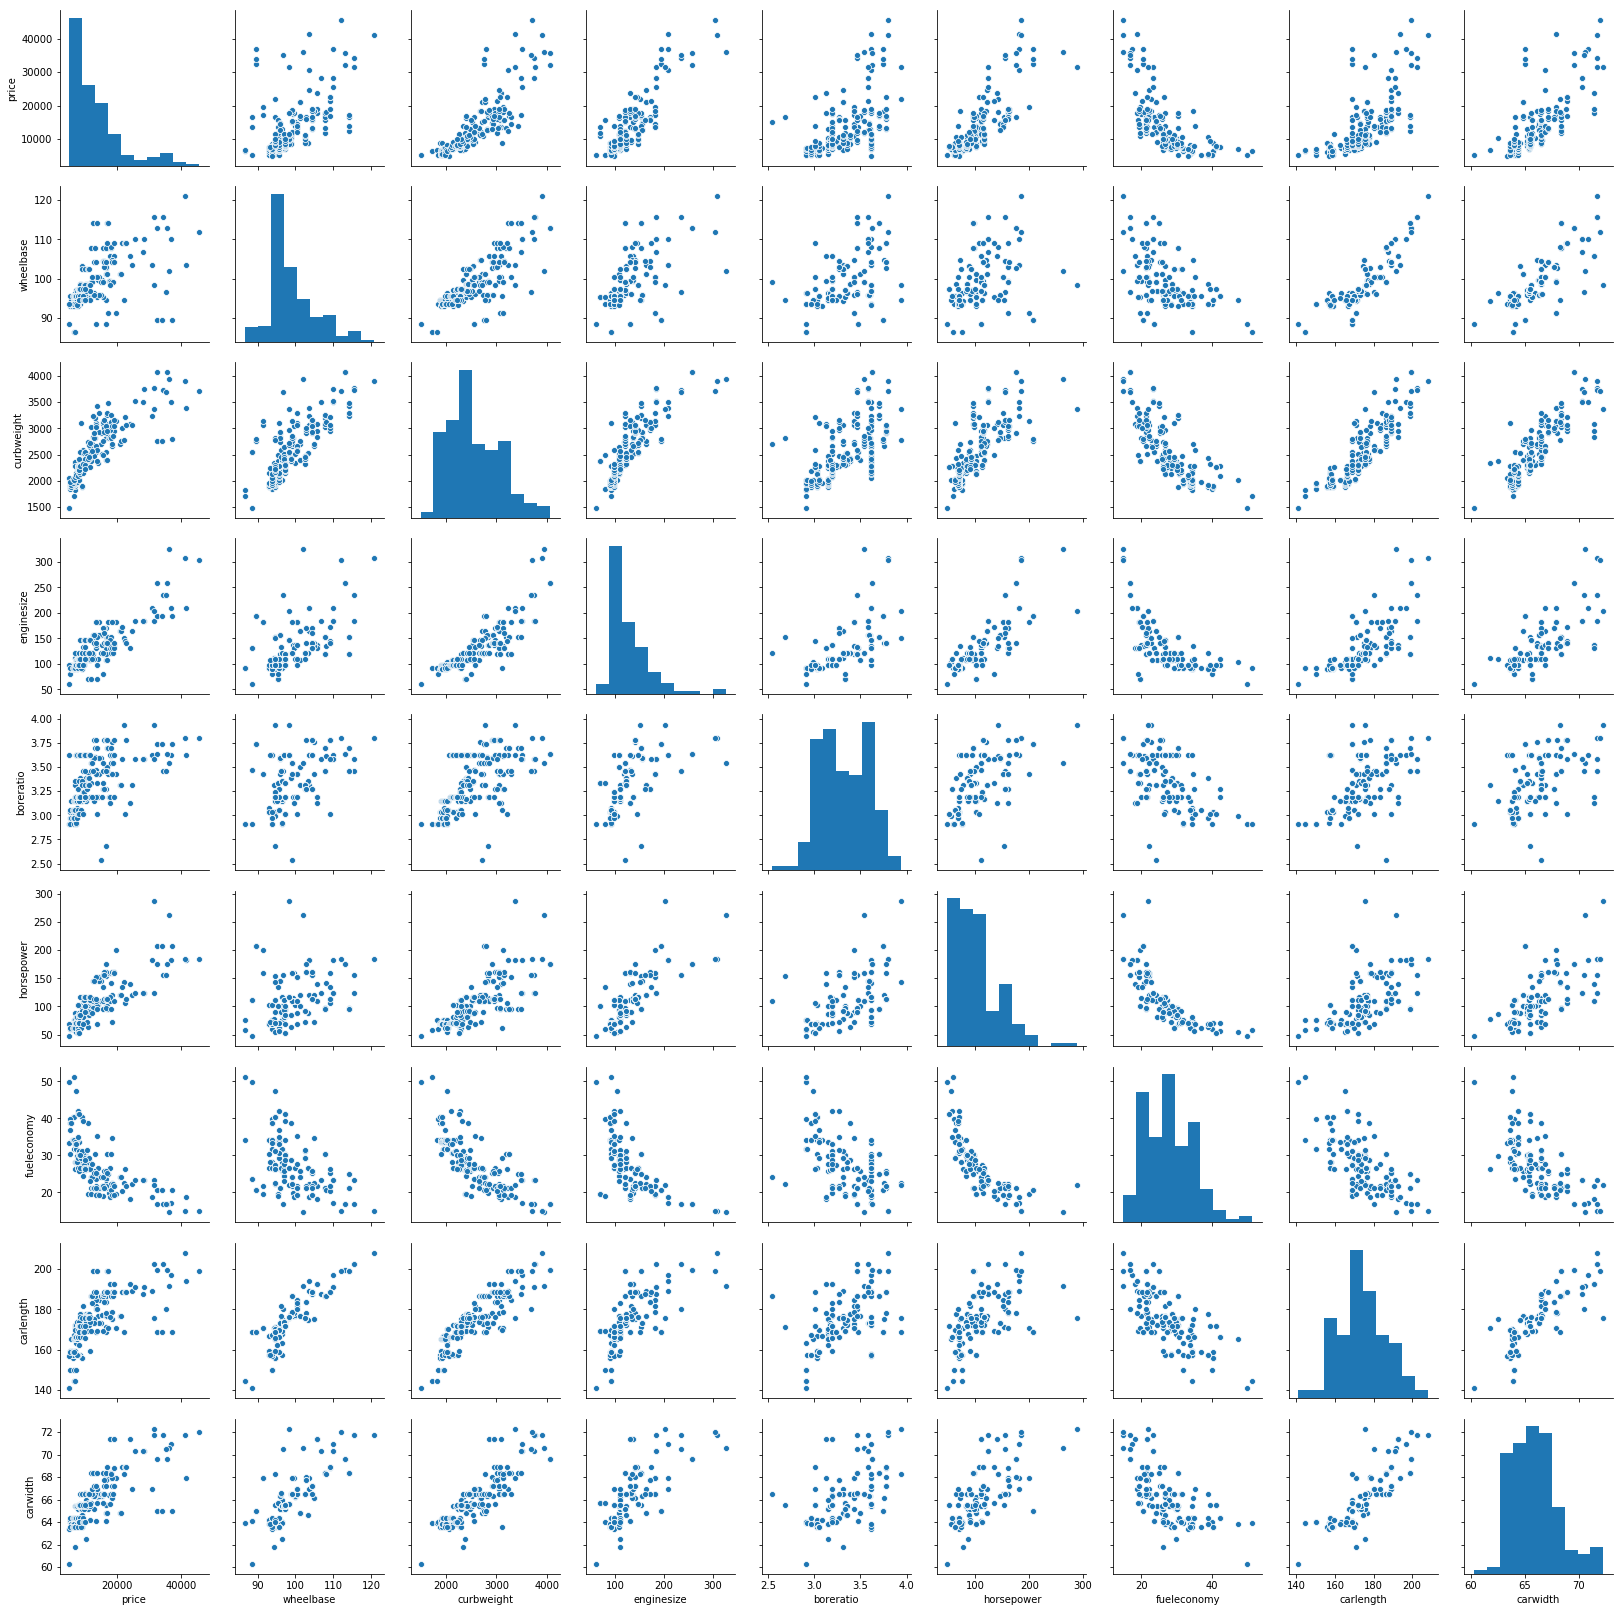

In [36]:
sns.pairplot(carprice_lr)
plt.show()

## Create the Dummy Variables 

In [37]:
# Defining the map function

def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

# Applying the function to the cars_lr

carprice_lr = dummies('fueltype',carprice_lr)
carprice_lr = dummies('aspiration',carprice_lr)
carprice_lr = dummies('carbody',carprice_lr)
carprice_lr = dummies('drivewheel',carprice_lr)
carprice_lr = dummies('enginetype',carprice_lr)
carprice_lr = dummies('cylindernumber',carprice_lr)
carprice_lr = dummies('carsrange',carprice_lr)
carprice_lr.head()

price  wheelbase  curbweight  enginesize  boreratio  horsepower  \
0  13495       88.6        2548         130       3.47         111   
1  16500       88.6        2548         130       3.47         111   
2  16500       94.5        2823         152       2.68         154   
3  13950       99.8        2337         109       3.19         102   
4  17450       99.4        2824         136       3.19         115   

   fueleconomy  carlength  carwidth  gas  turbo  hardtop  hatchback  sedan  \
0        23.70      168.8      64.1    1      0        0          0      0   
1        23.70      168.8      64.1    1      0        0          0      0   
2        22.15      171.2      65.5    1      0        0          1      0   
3        26.70      176.6      66.2    1      0        0          0      1   
4        19.80      176.6      66.4    1      0        0          0      1   

   wagon  fwd  rwd  dohcv  l  ohc  ohcf  ohcv  rotor  five  four  six  three  \
0      0    0    1      0  0    0     0     0      0     0     1    0      0   
1      0    0    1      0  0    0     0     0      0     0     1    0      0   
2      0    0    1      0  0    0     0     1      0     0     0    1      0   
3      0    1    0      0  0    1     0     0      0     0     1    0      0   
4      0    0    0      0  0    1     0     0      0     1     0    0      0   

   twelve  two  Medium  Highend  
0       0    0       1        0  
1       0    0       1        0  
2       0    0       1        0  
3       0    0       1        0  
4       0    0       1        0

In [38]:
carprice_lr.shape

(205, 31)

## Train - Test Split

In [39]:
np.random.seed(0)
df_train, df_test = train_test_split(carprice_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

In [40]:
df_train.head(10)

price  wheelbase  curbweight  enginesize  boreratio  horsepower  \
122   7609       93.7        2191          98       2.97          68   
125  22018       94.5        2778         151       3.94         143   
166   9538       94.5        2300          98       3.24         112   
1    16500       88.6        2548         130       3.47         111   
199  18950      104.3        3157         130       3.62         162   
190   9980       94.5        2221         109       3.19          90   
96    7499       94.5        1971          97       3.15          69   
177  11248      102.4        2458         122       3.31          92   
181  15750      104.5        3151         161       3.27         156   
97    7999       94.5        2037          97       3.15          69   

     fueleconomy  carlength  carwidth  gas  turbo  hardtop  hatchback  sedan  \
122        34.15      167.3      63.8    1      0        0          0      1   
125        22.60      168.9      68.3    1      0        0          1      0   
166        27.35      168.7      64.0    1      0        0          1      0   
1          23.70      168.8      64.1    1      0        0          0      0   
199        19.25      188.8      67.2    1      1        0          0      0   
190        26.25      165.7      64.0    1      0        0          1      0   
96         33.70      165.3      63.8    1      0        0          0      1   
177        29.25      175.6      66.5    1      0        0          1      0   
181        21.25      187.8      66.5    1      0        0          0      0   
97         33.70      170.2      63.8    1      0        0          0      0   

     wagon  fwd  rwd  dohcv  l  ohc  ohcf  ohcv  rotor  five  four  six  \
122      0    1    0      0  0    1     0     0      0     0     1    0   
125      0    0    1      0  0    1     0     0      0     0     1    0   
166      0    0    1      0  0    0     0     0      0     0     1    0   
1        0    0    1      0  0    0     0     0      0     0     1    0   
199      1    0    1      0  0    1     0     0      0     0     1    0   
190      0    1    0      0  0    1     0     0      0     0     1    0   
96       0    1    0      0  0    1     0     0      0     0     1    0   
177      0    1    0      0  0    1     0     0      0     0     1    0   
181      1    0    1      0  0    0     0     0      0     0     0    1   
97       1    1    0      0  0    1     0     0      0     0     1    0   

     three  twelve  two  Medium  Highend  
122      0       0    0       0        0  
125      0       0    0       0        1  
166      0       0    0       0        0  
1        0       0    0       1        0  
199      0       0    0       1        0  
190      0       0    0       1        0  
96       0       0    0       1        0  
177      0       0    0       0        0  
181      0       0    0       0        0  
97       0       0    0       1        0

In [41]:
df_test.head(10)

price  wheelbase  curbweight  enginesize  boreratio  horsepower  \
160   7738       95.7        2094          98       3.19          70   
186   8495       97.3        2275         109       3.19          85   
59    8845       98.8        2385         122       3.39          84   
165   9298       94.5        2265          98       3.24         112   
140   7603       93.3        2240         108       3.62          73   
64   11245       98.8        2425         122       3.39          84   
198  18420      104.3        3045         130       3.62         162   
75   16503      102.7        2910         140       3.78         175   
172  17669       98.4        2975         146       3.62         116   
104  17199       91.3        3071         181       3.43         160   

     fueleconomy  carlength  carwidth  gas  turbo  hardtop  hatchback  sedan  \
160        42.05      166.3      64.4    1      0        0          0      1   
186        30.15      171.7      65.5    1      0        0          0      1   
59         28.70      177.8      66.5    1      0        0          1      0   
165        27.35      168.7      64.0    1      0        0          0      1   
140        28.25      157.3      63.8    1      0        0          1      0   
64         28.70      177.8      66.5    1      0        0          1      0   
198        19.25      188.8      67.2    1      1        0          0      1   
75         21.25      178.4      68.0    1      1        0          1      0   
172        26.70      176.2      65.6    1      0        0          0      0   
104        21.70      170.7      67.9    1      0        0          1      0   

     wagon  fwd  rwd  dohcv  l  ohc  ohcf  ohcv  rotor  five  four  six  \
160      0    1    0      0  0    1     0     0      0     0     1    0   
186      0    1    0      0  0    1     0     0      0     0     1    0   
59       0    1    0      0  0    1     0     0      0     0     1    0   
165      0    0    1      0  0    0     0     0      0     0     1    0   
140      0    0    0      0  0    0     1     0      0     0     1    0   
64       0    1    0      0  0    1     0     0      0     0     1    0   
198      0    0    1      0  0    1     0     0      0     0     1    0   
75       0    0    1      0  0    1     0     0      0     0     1    0   
172      0    0    1      0  0    1     0     0      0     0     1    0   
104      0    0    1      0  0    0     0     1      0     0     0    1   

     three  twelve  two  Medium  Highend  
160      0       0    0       0        0  
186      0       0    0       1        0  
59       0       0    0       1        0  
165      0       0    0       0        0  
140      0       0    0       0        0  
64       0       0    0       1        0  
198      0       0    0       1        0  
75       0       0    0       1        0  
172      0       0    0       0        0  
104      0       0    0       1        0

In [42]:
# Feature scaling, Normalization

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head(10)

price  wheelbase  curbweight  enginesize  boreratio  horsepower  \
122  0.068818   0.244828    0.272692    0.139623   0.230159    0.083333   
125  0.466890   0.272414    0.500388    0.339623   1.000000    0.395833   
166  0.122110   0.272414    0.314973    0.139623   0.444444    0.266667   
1    0.314446   0.068966    0.411171    0.260377   0.626984    0.262500   
199  0.382131   0.610345    0.647401    0.260377   0.746032    0.475000   
190  0.134321   0.272414    0.284329    0.181132   0.404762    0.175000   
96   0.065779   0.272414    0.187355    0.135849   0.373016    0.087500   
177  0.169351   0.544828    0.376261    0.230189   0.500000    0.183333   
181  0.293726   0.617241    0.645074    0.377358   0.468254    0.450000   
97   0.079592   0.272414    0.212956    0.135849   0.373016    0.087500   

     fueleconomy  carlength  carwidth  gas  turbo  hardtop  hatchback  sedan  \
122     0.530864   0.426016  0.291667    1      0        0          0      1   
125     0.213992   0.452033  0.666667    1      0        0          1      0   
166     0.344307   0.448780  0.308333    1      0        0          1      0   
1       0.244170   0.450407  0.316667    1      0        0          0      0   
199     0.122085   0.775610  0.575000    1      1        0          0      0   
190     0.314129   0.400000  0.308333    1      0        0          1      0   
96      0.518519   0.393496  0.291667    1      0        0          0      1   
177     0.396433   0.560976  0.516667    1      0        0          1      0   
181     0.176955   0.759350  0.516667    1      0        0          0      0   
97      0.518519   0.473171  0.291667    1      0        0          0      0   

     wagon  fwd  rwd  dohcv  l  ohc  ohcf  ohcv  rotor  five  four  six  \
122      0    1    0      0  0    1     0     0      0     0     1    0   
125      0    0    1      0  0    1     0     0      0     0     1    0   
166      0    0    1      0  0    0     0     0      0     0     1    0   
1        0    0    1      0  0    0     0     0      0     0     1    0   
199      1    0    1      0  0    1     0     0      0     0     1    0   
190      0    1    0      0  0    1     0     0      0     0     1    0   
96       0    1    0      0  0    1     0     0      0     0     1    0   
177      0    1    0      0  0    1     0     0      0     0     1    0   
181      1    0    1      0  0    0     0     0      0     0     0    1   
97       1    1    0      0  0    1     0     0      0     0     1    0   

     three  twelve  two  Medium  Highend  
122      0       0    0       0        0  
125      0       0    0       0        1  
166      0       0    0       0        0  
1        0       0    0       1        0  
199      0       0    0       1        0  
190      0       0    0       1        0  
96       0       0    0       1        0  
177      0       0    0       0        0  
181      0       0    0       0        0  
97       0       0    0       1        0

In [43]:
df_train.describe()

price   wheelbase  curbweight  enginesize   boreratio  horsepower  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.219309    0.411141    0.407878    0.241351    0.497946    0.227302   
std      0.215682    0.205581    0.211269    0.154619    0.207140    0.165511   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.067298    0.272414    0.245539    0.135849    0.305556    0.091667   
50%      0.140343    0.341379    0.355702    0.184906    0.500000    0.191667   
75%      0.313479    0.503448    0.559542    0.301887    0.682540    0.283333   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       fueleconomy   carlength    carwidth         gas       turbo  \
count   143.000000  143.000000  143.000000  143.000000  143.000000   
mean      0.358265    0.525476    0.461655    0.909091    0.181818   
std       0.185980    0.204848    0.184517    0.288490    0.387050   
min       0.000000    0.000000    0.000000    0.000000    0.000000   
25%       0.198903    0.399187    0.304167    1.000000    0.000000   
50%       0.344307    0.502439    0.425000    1.000000    0.000000   
75%       0.512346    0.669919    0.550000    1.000000    0.000000   
max       1.000000    1.000000    1.000000    1.000000    1.000000   

          hardtop   hatchback       sedan       wagon         fwd         rwd  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.020979    0.342657    0.475524    0.132867    0.594406    0.349650   
std      0.143818    0.476266    0.501156    0.340624    0.492733    0.478536   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    1.000000    0.000000   
75%      0.000000    1.000000    1.000000    0.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

            dohcv           l         ohc        ohcf        ohcv       rotor  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.006993    0.062937    0.685315    0.083916    0.062937    0.027972   
std      0.083624    0.243703    0.466023    0.278236    0.243703    0.165472   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

             five        four         six       three      twelve         two  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.062937    0.741259    0.132867    0.006993    0.006993    0.027972   
std      0.243703    0.439483    0.340624    0.083624    0.083624    0.165472   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           Medium     Highend  
count  143.000000  143.000000  
mean     0.412587    0.118881  
std      0.494030    0.324786  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      1.000000    0.000000  
max      1.000000    1.000000

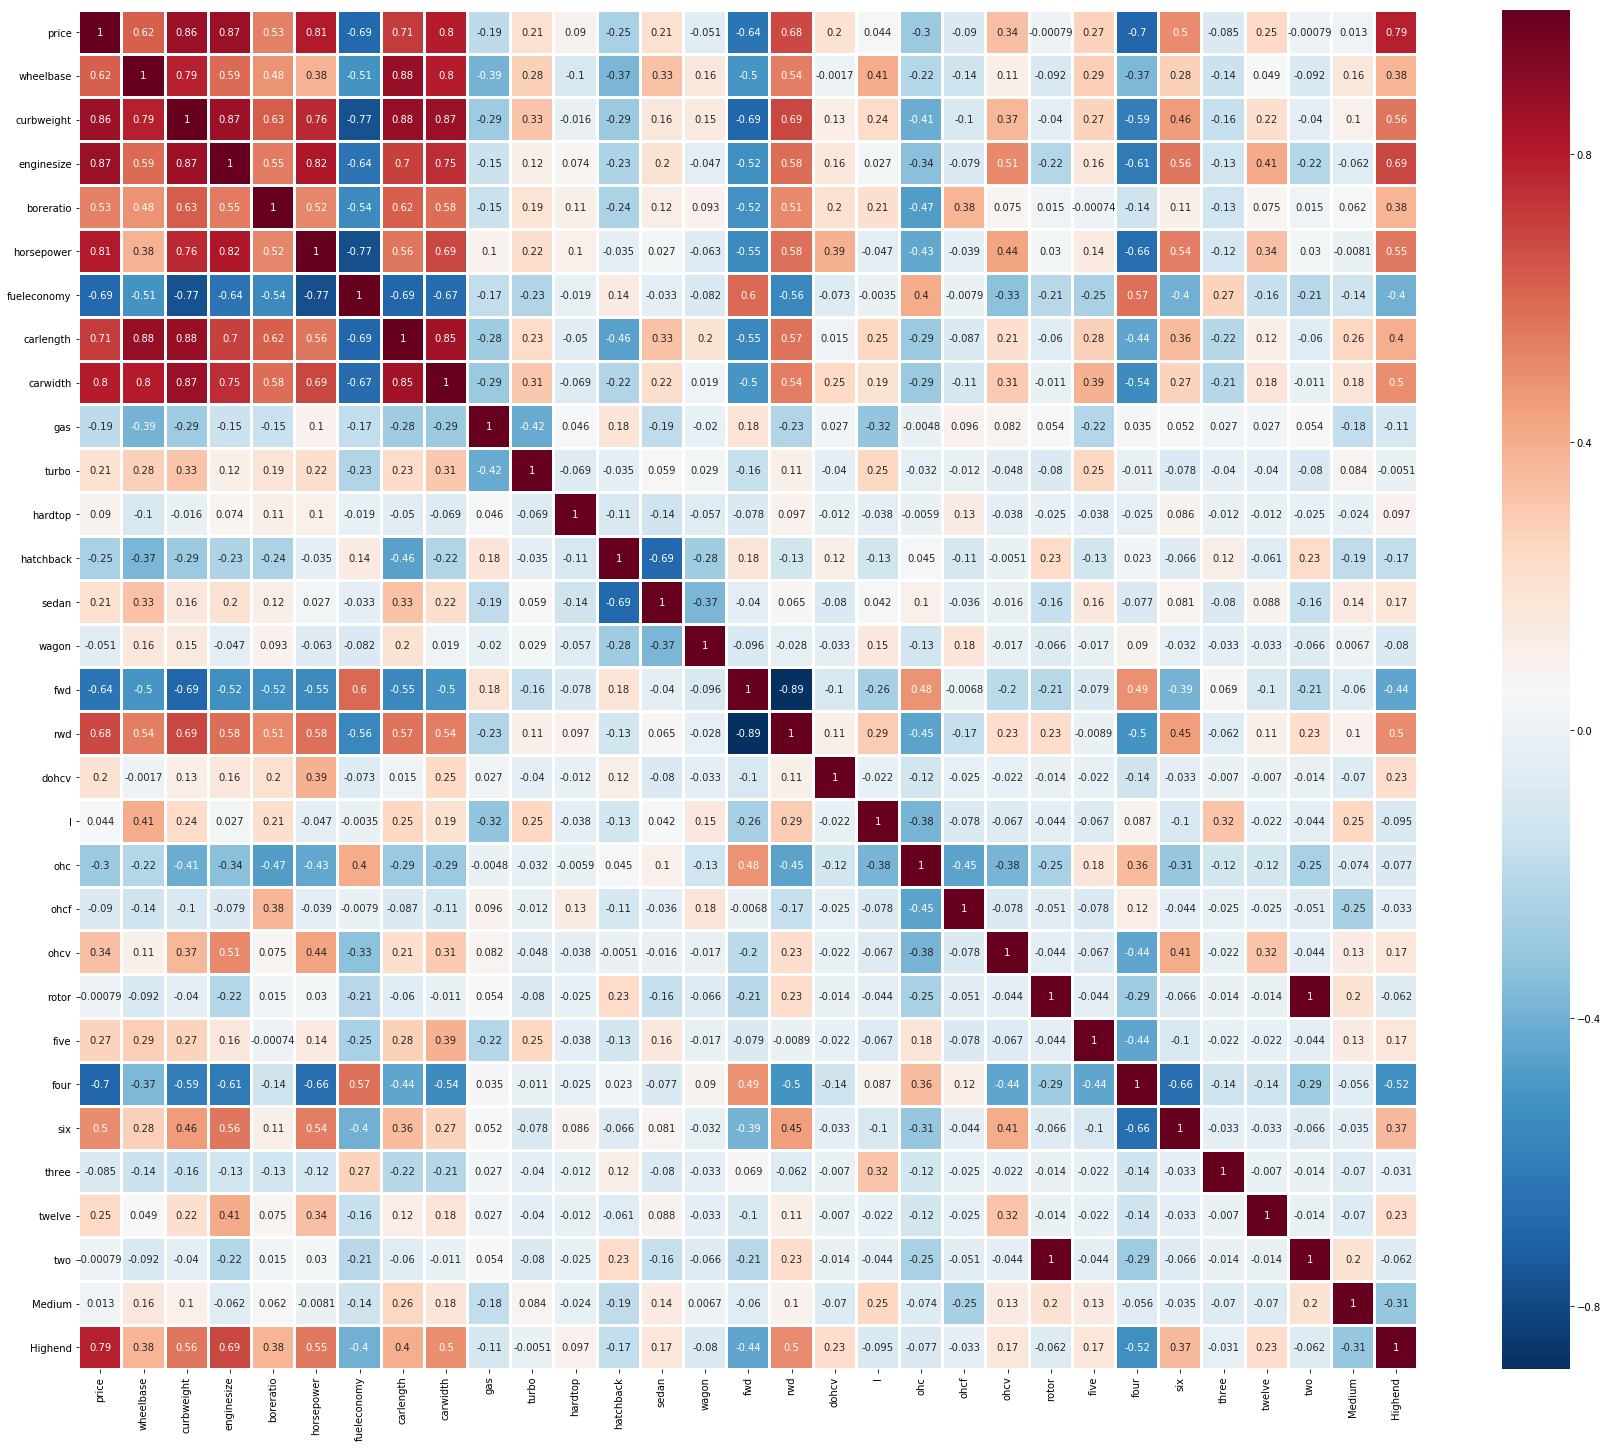

In [44]:
# Correlation using heatmap

plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="RdBu_r", linecolor = 'white', linewidths = 2)
plt.show()

Highly correlated variables to price are - curbweight, enginesize, horsepower, carwidth and highend.

In [45]:
# Divide data into X and y variables

y_train = df_train.pop('price')
X_train = df_train

## Model Building

In [46]:
# RFE

lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [47]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 3),
 ('curbweight', True, 1),
 ('enginesize', False, 13),
 ('boreratio', False, 10),
 ('horsepower', True, 1),
 ('fueleconomy', True, 1),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('gas', False, 17),
 ('turbo', False, 18),
 ('hardtop', False, 2),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 16),
 ('rwd', False, 15),
 ('dohcv', True, 1),
 ('l', False, 19),
 ('ohc', False, 7),
 ('ohcf', False, 8),
 ('ohcv', False, 9),
 ('rotor', False, 21),
 ('five', False, 6),
 ('four', False, 4),
 ('six', False, 5),
 ('three', False, 14),
 ('twelve', True, 1),
 ('two', False, 20),
 ('Medium', False, 12),
 ('Highend', True, 1)]

In [48]:
X_train.columns[rfe.support_]

Index(['curbweight', 'horsepower', 'fueleconomy', 'carwidth', 'hatchback',
       'sedan', 'wagon', 'dohcv', 'twelve', 'Highend'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [49]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

curbweight  horsepower  fueleconomy  carwidth  hatchback  sedan  wagon  \
122    0.272692    0.083333     0.530864  0.291667          0      1      0   
125    0.500388    0.395833     0.213992  0.666667          1      0      0   
166    0.314973    0.266667     0.344307  0.308333          1      0      0   
1      0.411171    0.262500     0.244170  0.316667          0      0      0   
199    0.647401    0.475000     0.122085  0.575000          0      0      1   

     dohcv  twelve  Highend  
122      0       0        0  
125      0       0        1  
166      0       0        0  
1        0       0        0  
199      0       0        0

In [50]:
# Functions to build the model

def build_model(X,y):
    X = sm.add_constant(X)
    lm = sm.OLS(y,X).fit()
    print(lm.summary())
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

### Model - 1

In [51]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     172.1
Date:                Wed, 20 May 2020   Prob (F-statistic):           1.29e-70
Time:                        13:14:37   Log-Likelihood:                 205.85
No. Observations:                 143   AIC:                            -389.7
Df Residuals:                     132   BIC:                            -357.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0947      0.042     -2.243      

The p-vale of twelve is higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [52]:
X_train_new = X_train_rfe.drop(["twelve"], axis = 1)
X_train_new.head()

curbweight  horsepower  fueleconomy  carwidth  hatchback  sedan  wagon  \
122    0.272692    0.083333     0.530864  0.291667          0      1      0   
125    0.500388    0.395833     0.213992  0.666667          1      0      0   
166    0.314973    0.266667     0.344307  0.308333          1      0      0   
1      0.411171    0.262500     0.244170  0.316667          0      0      0   
199    0.647401    0.475000     0.122085  0.575000          0      0      1   

     dohcv  Highend  
122      0        0  
125      0        1  
166      0        0  
1        0        0  
199      0        0

### Model - 2

In [53]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     187.9
Date:                Wed, 20 May 2020   Prob (F-statistic):           4.25e-71
Time:                        13:14:40   Log-Likelihood:                 204.17
No. Observations:                 143   AIC:                            -388.3
Df Residuals:                     133   BIC:                            -358.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0764      0.041     -1.851      

The p-vale of fueleconomy is higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [54]:
X_train_new = X_train_new.drop(["fueleconomy"], axis = 1)
X_train_new.head()

const  curbweight  horsepower  carwidth  hatchback  sedan  wagon  dohcv  \
122    1.0    0.272692    0.083333  0.291667          0      1      0      0   
125    1.0    0.500388    0.395833  0.666667          1      0      0      0   
166    1.0    0.314973    0.266667  0.308333          1      0      0      0   
1      1.0    0.411171    0.262500  0.316667          0      0      0      0   
199    1.0    0.647401    0.475000  0.575000          0      0      1      0   

     Highend  
122        0  
125        1  
166        0  
1          0  
199        0

### Model - 3

In [55]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     209.5
Date:                Wed, 20 May 2020   Prob (F-statistic):           7.85e-72
Time:                        13:14:42   Log-Likelihood:                 203.07
No. Observations:                 143   AIC:                            -388.1
Df Residuals:                     134   BIC:                            -361.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0305      0.026     -1.165      0.2

In [56]:
# Calculate the Variance Inflation Factor

checkVIF(X_train_new)

Features    VIF
0       const  26.90
1  curbweight   8.10
5       sedan   6.07
4   hatchback   5.63
3    carwidth   5.14
2  horsepower   3.61
6       wagon   3.58
8     Highend   1.63
7       dohcv   1.46

Dropping curbweight because of high VIF value which shows that curbweight has high multicollinearity.

In [57]:
X_train_new = X_train_new.drop(["curbweight"], axis = 1)
X_train_new.head()

const  horsepower  carwidth  hatchback  sedan  wagon  dohcv  Highend
122    1.0    0.083333  0.291667          0      1      0      0        0
125    1.0    0.395833  0.666667          1      0      0      0        1
166    1.0    0.266667  0.308333          1      0      0      0        0
1      1.0    0.262500  0.316667          0      0      0      0        0
199    1.0    0.475000  0.575000          0      0      1      0        0

### Model - 4

In [58]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.9
Date:                Wed, 20 May 2020   Prob (F-statistic):           4.70e-70
Time:                        13:14:44   Log-Likelihood:                 195.77
No. Observations:                 143   AIC:                            -375.5
Df Residuals:                     135   BIC:                            -351.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0319      0.027     -1.161      0.2

In [59]:
checkVIF(X_train_new)

Features    VIF
0       const  26.89
4       sedan   6.06
3   hatchback   5.54
5       wagon   3.47
1  horsepower   2.50
2    carwidth   2.22
7     Highend   1.56
6       dohcv   1.21

Dropping sedan because of high VIF value.

In [60]:
X_train_new = X_train_new.drop(["sedan"], axis = 1)
X_train_new.head()

const  horsepower  carwidth  hatchback  wagon  dohcv  Highend
122    1.0    0.083333  0.291667          0      0      0        0
125    1.0    0.395833  0.666667          1      0      0        1
166    1.0    0.266667  0.308333          1      0      0        0
1      1.0    0.262500  0.316667          0      0      0        0
199    1.0    0.475000  0.575000          0      1      0        0

### Model - 5

In [61]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     237.6
Date:                Wed, 20 May 2020   Prob (F-statistic):           1.68e-69
Time:                        13:14:47   Log-Likelihood:                 191.46
No. Observations:                 143   AIC:                            -368.9
Df Residuals:                     136   BIC:                            -348.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0934      0.018     -5.219      0.0

In [62]:
checkVIF(X_train_new)

Features    VIF
0       const  10.82
1  horsepower   2.39
2    carwidth   2.09
6     Highend   1.55
3   hatchback   1.23
5       dohcv   1.21
4       wagon   1.11

Dropping wagon because of high p-value.

In [63]:
X_train_new = X_train_new.drop(["wagon"], axis = 1)
X_train_new.head()

const  horsepower  carwidth  hatchback  dohcv  Highend
122    1.0    0.083333  0.291667          0      0        0
125    1.0    0.395833  0.666667          1      0        1
166    1.0    0.266667  0.308333          1      0        0
1      1.0    0.262500  0.316667          0      0        0
199    1.0    0.475000  0.575000          0      0        0

### Model - 6

In [64]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Wed, 20 May 2020   Prob (F-statistic):           1.57e-70
Time:                        13:14:51   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0970      0.018     -5.530      0.0

In [65]:
checkVIF(X_train_new)

Features    VIF
0       const  10.39
1  horsepower   2.39
2    carwidth   2.08
5     Highend   1.53
4       dohcv   1.21
3   hatchback   1.13

In [66]:
# Dropping dohcv to see the changes in model statistics

X_train_new = X_train_new.drop(["dohcv"], axis = 1)
X_train_new.head()

const  horsepower  carwidth  hatchback  Highend
122    1.0    0.083333  0.291667          0        0
125    1.0    0.395833  0.666667          1        1
166    1.0    0.266667  0.308333          1        0
1      1.0    0.262500  0.316667          0        0
199    1.0    0.475000  0.575000          0        0

### Model - 7

In [67]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Wed, 20 May 2020   Prob (F-statistic):           1.04e-67
Time:                        13:14:53   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0824      0.018     -4.480      0.0

In [68]:
checkVIF(X_train_new)

Features    VIF
0       const  10.04
1  horsepower   2.22
2    carwidth   2.08
4     Highend   1.53
3   hatchback   1.10

### Residual Analysis of model

In [69]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)
y_train_price.head()

122    0.069643
125    0.593598
166    0.115545
1      0.158405
199    0.354161
dtype: float64

Text(0.5, 0, 'Errors')

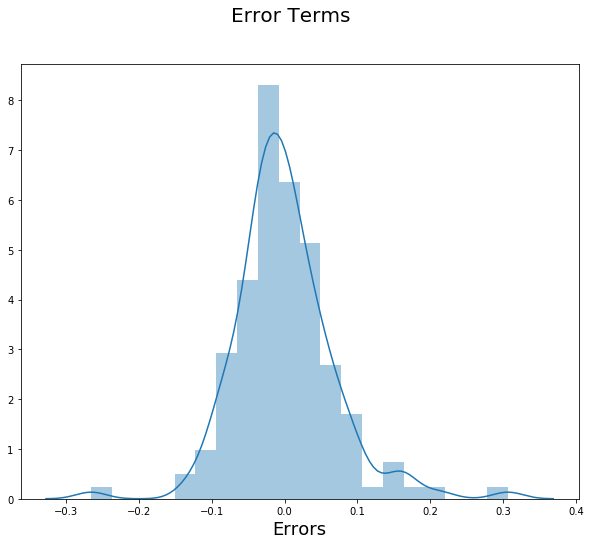

In [70]:
# Plot the histogram of the error terms

fig = plt.figure(figsize=(10,8))
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

Error terms are normally distributed, so the assumption on the linear modeling seems to be fulfilled.

## Prediction and Evaluation

In [71]:
# Scaling the test set

num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_test[num_vars].head()

wheelbase  curbweight  enginesize  boreratio  horsepower  fueleconomy  \
160   0.265306    0.132148    0.082969   0.515873    0.116129     1.000000   
186   0.311953    0.219125    0.131004   0.515873    0.212903     0.561694   
59    0.355685    0.271985    0.187773   0.674603    0.206452     0.508287   
165   0.230321    0.214320    0.082969   0.555556    0.387097     0.458564   
140   0.195335    0.202307    0.126638   0.857143    0.135484     0.491713   

     carlength  carwidth     price  
160   0.341732  0.200000  0.058474  
186   0.426772  0.315789  0.077398  
59    0.522835  0.421053  0.086148  
165   0.379528  0.157895  0.097473  
140   0.200000  0.136842  0.055099

In [72]:
# Dividing into X and y

y_test = df_test.pop('price')
X_test = df_test

In [73]:
# Now let's use our model to make predictions

X_train_new = X_train_new.drop('const',axis=1)

In [74]:
# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[X_train_new.columns]

In [75]:
# Adding a constant variable

X_test_new = sm.add_constant(X_test_new)

In [76]:
# Making predictions

y_pred = lm.predict(X_test_new)

### Evaluation of test via comparison of y_pred and y_test

In [77]:
from sklearn.metrics import r2_score 
R2_Score = r2_score(y_test, y_pred)
print('The R2 - score is:',R2_Score)

The R2 - score is: 0.8614595209022033


Text(0, 0.5, 'y_pred')

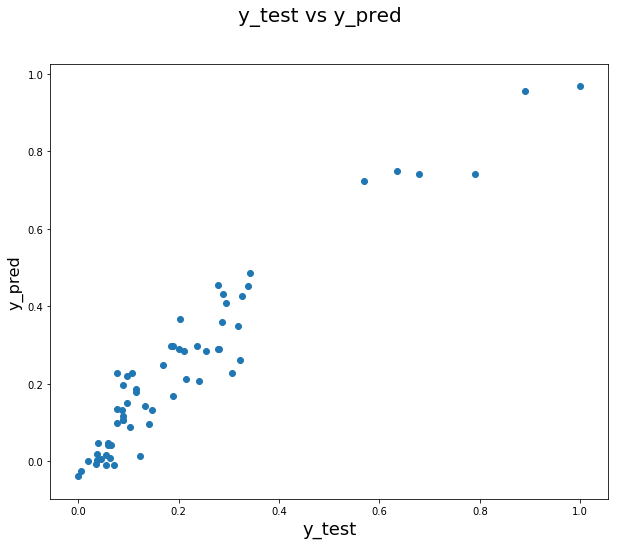

In [78]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread

fig = plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)   

### Evaluation of the Model using Statistics

In [79]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Wed, 20 May 2020   Prob (F-statistic):           1.04e-67
Time:                        13:15:09   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0824      0.018     -4.480      0.0

R-sqaured and Adjusted R-squared (extent of fit) = 0.899 and 0.896 = 90% variance explained.

F-stats and Prob(F-stats) (overall model fit) = 308.0 and 1.04e-67(approx. 0.0) = Model fit is significant and explained 90% variance is just not by chance.

p-values = p-values for all the coefficients seem to be less than the significance level of 0.05 = That all the predictors are statistically significant.

## END 